In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
import math
import seaborn as sns

In [106]:
teamname = "Vasco da Gama"

matches = pd.read_csv("spi_matches.csv")
team_matches = matches[np.logical_or(matches['team1'] == teamname, matches['team2'] == teamname)]
team_matches_data = team_matches.loc[:, ['date', 'team1', 'team2', 'score1', 'score2', 'prob1', 'prob2', 'importance1', 'importance2', 'spi1', 'spi2']]

In [107]:
for label, row in team_matches_data.iterrows() :
    print(str(row["date"]) + " : " + str(row["team1"]) + " " + str(row["score1"])[0] + "x"  + str(row["score2"])[0] + " " + str(row["team2"]))
    if(row['team1'] == teamname) :
        team_matches_data.loc[label, "goals_team"] = row['score1']
        team_matches_data.loc[label, "goals_adv"] = row['score2']
        team_matches_data.loc[label, "place"] = 0.0
        team_matches_data.loc[label, "prob_team"] = row['prob1']
        team_matches_data.loc[label, "spi_team"] = row['spi1']
        if(math.isnan(row['importance1'])) :
            team_matches_data.loc[label, "importance_team"] = 25.0
        else : 
            team_matches_data.loc[label, "importance_team"] = row['importance1']
    else :
        team_matches_data.loc[label, "goals_team"] = row['score2']
        team_matches_data.loc[label, "goals_adv"] = row['score1']
        team_matches_data.loc[label, "place"] = 1.0
        team_matches_data.loc[label, "prob_team"] = row['prob2']
        team_matches_data.loc[label, "spi_team"] = row['spi2']
        if(math.isnan(row['importance2'])) :
            team_matches_data.loc[label, "importance_team"] = 25.0
        else :
            team_matches_data.loc[label, "importance_team"] = row['importance2']

2017-05-14 : Palmeiras 4x0 Vasco da Gama
2017-05-21 : Vasco da Gama 2x1 Bahía
2017-05-27 : Vasco da Gama 3x2 Fluminense
2017-06-04 : Grêmio 2x0 Vasco da Gama
2017-06-07 : Vasco da Gama 2x5 Corinthians
2017-06-10 : Vasco da Gama 2x1 Sport Recife
2017-06-14 : Chapecoense AF 2x1 Vasco da Gama
2017-06-17 : Vasco da Gama 1x0 Avaí
2017-06-21 : Botafogo 3x1 Vasco da Gama
2017-06-25 : Vasco da Gama 1x0 Atlético Goianiense
2017-07-02 : Coritiba 2x2 Vasco da Gama
2017-07-08 : Vasco da Gama 0x1 Flamengo
2017-07-12 : Vítoria 1x4 Vasco da Gama
2017-07-16 : Vasco da Gama 0x0 Santos
2017-07-19 : São Paulo 1x0 Vasco da Gama
2017-07-23 : Atletico Mineiro 1x2 Vasco da Gama
2017-07-31 : Vasco da Gama 0x1 Atlético Paranaense
2017-08-03 : Vasco da Gama 0x3 Cruzeiro
2017-08-06 : Ponte Preta 0x0 Vasco da Gama
2017-08-13 : Vasco da Gama 1x1 Palmeiras
2017-08-20 : Bahía 3x0 Vasco da Gama
2017-08-26 : Fluminense 0x1 Vasco da Gama
2017-09-09 : Vasco da Gama 1x0 Grêmio
2017-09-17 : Corinthians 1x0 Vasco da Gama
2

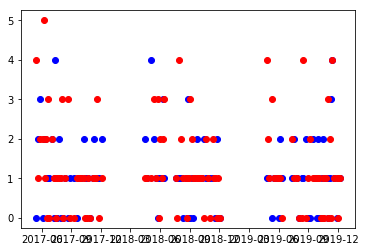

<Figure size 432x288 with 0 Axes>

In [108]:
team_matches_data.loc[:, "datetimeobj"] = team_matches_data.loc[:, "date"].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))

plt.plot_date(x=team_matches_data.loc[:, 'datetimeobj'], y=team_matches_data.loc[:,'goals_team'], xdate = True, ydate = False, color = 'blue')
plt.plot_date(x=team_matches_data.loc[:, 'datetimeobj'], y=team_matches_data.loc[:,'goals_adv'], xdate = True, ydate = False, color = 'red')
plt.show()
plt.clf()

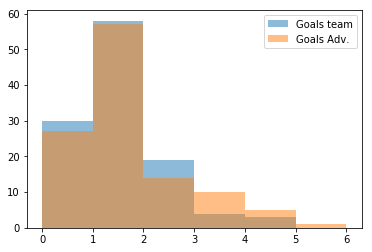

<Figure size 432x288 with 0 Axes>

In [109]:
plt.hist(team_matches_data['goals_team'], bins = range(7), alpha=0.5, label='Goals team')
plt.hist(team_matches_data['goals_adv'], bins = range(7), alpha=0.5, label='Goals Adv.')
plt.legend(loc='upper right')
plt.xticks(range(7))
plt.show()
plt.clf()

# Training kNeighbors to predict goal numbers

In [110]:
team_done_matches = team_matches_data[team_matches_data['datetimeobj'] < datetime.datetime.now() - datetime.timedelta(days=1)]
team_predict = team_done_matches[['goals_team','prob_team', 'importance_team', 'spi_team', 'place']]
X = team_predict.drop('goals_team', axis=1).values
y = team_predict['goals_team'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)
print("Predicted scores = ") 
print(knn.predict(X_test))
print("Precision of model = ") 
print(knn.score(X_test, y_test))


Predicted scores = 
[0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 2. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1.]
Precision of model = 
0.391304347826087


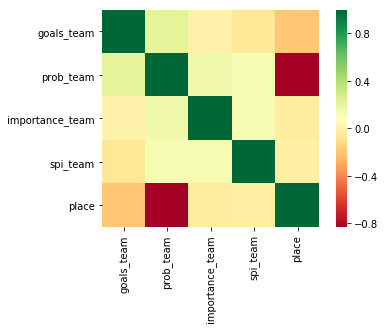

In [111]:
ax = sns.heatmap(team_predict.corr(), square=True, cmap='RdYlGn')
plt.show()